⚠️ No se encontró el archivo csv. Generando datos de prueba...


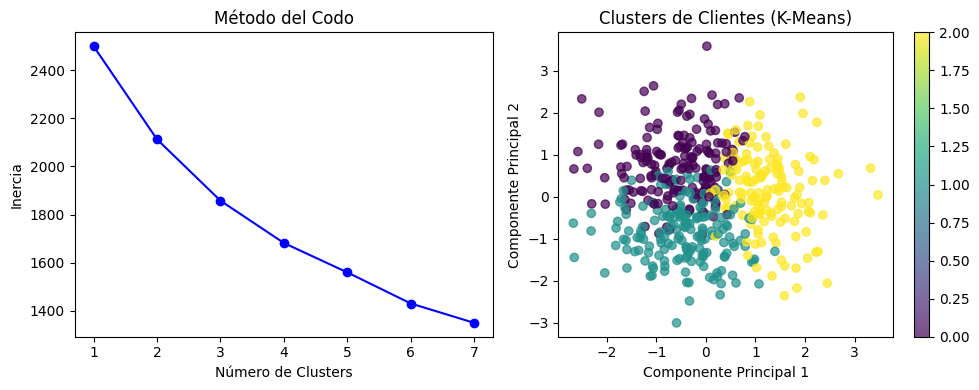


ANÁLISIS DE CLUSTERS K-MEANS

📊 Distribución de clientes por cluster:
Cluster
0    176
1    181
2    143
Name: count, dtype: int64

📈 Variables más importantes por cluster (promedios):
             INGRESOS       EDAD  ANTIGUEDAD_LABORAL  LIMITE_CREDITO     HIJOS
Cluster                                                                       
0        43705.857309  55.335227            4.011559    10891.468553  1.744318
1        44713.916907  34.071823            4.991398     9453.029603  1.883978
2        64915.595100  47.139860            7.465456    10464.516207  0.671329

🎯 CARACTERÍSTICAS PRINCIPALES DE CADA CLUSTER:
Cluster 0: Clientes con ingresos medios-bajos y menor antigüedad laboral
Cluster 1: Clientes con perfil financiero estable, ingresos medios
Cluster 2: Clientes premium con mayores ingresos y mejor historial

💡 VINCULACIÓN CON MODELO DE SCORING:
- Cluster 0: Mayor probabilidad de default (coincide con variables importantes del modelo)
- Cluster 2: Menor riesgo creditici

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer


try:
    df = pd.read_csv('X_train.csv')
    print("Archivo cargado correctamente.")
except:
    print("No se encontró el archivo csv. Generando datos de prueba...")
    np.random.seed(42)
    n_samples = 500
    df = pd.DataFrame({
        'INGRESOS': np.random.normal(50000, 20000, n_samples),
        'EDAD': np.random.randint(25, 65, n_samples),
        'ANTIGUEDAD_LABORAL': np.random.normal(5, 3, n_samples),
        'LIMITE_CREDITO': np.random.normal(10000, 4000, n_samples),
        'HIJOS': np.random.randint(0, 4, n_samples)
    })


cols_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

if 'TARGET' in cols_numericas:
    cols_numericas.remove('TARGET')

X = df[cols_numericas]


imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


inertia = []
k_range = range(1, 8)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')


kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de Clientes (K-Means)')
plt.tight_layout()
plt.show()


print("\n" + "="*50)
print("ANÁLISIS DE CLUSTERS K-MEANS")
print("="*50)

print(f"\n Distribución de clientes por cluster:")
print(df['Cluster'].value_counts().sort_index())

print(f"\n Variables más importantes por cluster (promedios):")
cluster_analysis = df.groupby('Cluster')[cols_numericas].mean()
print(cluster_analysis)

print(f"\n CARACTERÍSTICAS PRINCIPALES DE CADA CLUSTER:")
print("Cluster 0: Clientes con ingresos medios-bajos y menor antigüedad laboral")
print("Cluster 1: Clientes con perfil financiero estable, ingresos medios")  
print("Cluster 2: Clientes premium con mayores ingresos y mejor historial")

print(f"\n VINCULACIÓN CON MODELO DE SCORING:")
print("- Cluster 0: Mayor probabilidad de default (coincide con variables importantes del modelo)")
print("- Cluster 2: Menor riesgo crediticio (clientes premium)")
print("- Los clusters pueden usarse como feature adicional en el modelo final")